# Exercício 1

### A função $f(x) = x^4 + 4x^3 + 6x^2 + 3x -10$ possui um zero positivo e um zero negativo. Pede-se:

#### a) Encontre, pelo Método da Bissecção, o zero positivo de $f$, partindo de um intervalo de comprimento 1, com precisão de $10^{-3}$

In [79]:
import pandas as pd

x = [-20, -5, -3, -2,-1, 0, 1, 5, 20]
f_x = [j**4 + 4*(j**3) + 6*(j**2) + 3*j - 10 for j in x]
tabela = {'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,f(x)
-20,130330
-5,250
-3,8
-2,-8
-1,-10
0,-10
1,4
5,1280
20,194450


Pela tabela acima, é possível ver que o zero negativo está entre $[-3, -2]$ e o zero positivo está entre $[0,1]$. Como só queremos o zero positivo, usaremos o segundo intervalo. No código abaixo se tem uma função usada para executar o método da bissecção e gerar uma tabela.

In [124]:
import pandas as pd


def bissecao(f, a, b, precisao, max_iteracoes):
    '''
    - Função: bissecao(f, a, b, precisao, max_iteracoes)
    - Autor: Eduardo Freire Mangabeira
    - Obtém um zero de uma função pelo método da bisseção.
    - Feito a partir das aulas do professor Hamilton e do livro Burden, R. L., & Faires, D. J. (1985). Numerical analysis.
    - É precisso passar uma expressão lambda para o parâmetro 'f', fiz isso para deixar o código mais geral e menos verboso.
    - Para expresões lambda, visitar: http://www.dsc.ufcg.edu.br/~pet/jornal/maio2013/materias/tutoriais.html.
    '''
    i = 1
    f_a = f(a)
    p = a + (b-a)/2
    f_p = f(p)
    dados = {'n': [], 'a_n': [], 'b_n': [], 'x_n': [], 'f(a_n)': [], 'f(b_n)': [], 'f(x_n)': []}
    tabela = pd.DataFrame(dados)
    while i <= max_iteracoes:
        p = a + (b-a)/2
        f_p = f(p)
        f_b = f(b)
        dados_2 = {'n': [i], 'a_n': [a], 'b_n': [b], 'x_n': [p], 'f(a_n)': [f_a], 'f(b_n)': [f_b], 'f(x_n)': [f_p]}
        tabela_2 = pd.DataFrame(dados_2)
        tabela = tabela.append(tabela_2, ignore_index = True)
        if f_p == 0 or (b-a)/2 < precisao:
            print("O valor de x que aproxima ao zero da função é: {}".format(p))
            return tabela
        i = i + 1
        if f_a * f_p > 0:
            a = p
            f_a = f_p
        else:
            b = p

In [42]:
print(bissecao.__doc__)


    - Função: bissecao(f, a, b, precisao, max_iteracoes)
    - Autor: Eduardo Freire Mangabeira
    - Obtém um zero de uma função pelo método da bisseção.
    - Feito a partir das aulas do professor Hamilton e do livro Burden, R. L., & Faires, D. J. (1985). Numerical analysis.
    - É precisso passar uma expressão lambda para o parâmetro 'f', fiz isso para deixar o código mais geral e menos verboso.
    - Para expresões lambda, visitar: http://www.dsc.ufcg.edu.br/~pet/jornal/maio2013/materias/tutoriais.html.
    


Agora basta usar os valores dados na questão, considerando o intervalo $[0,1]$.

In [81]:
# f(x) = x^4 + 4(x^3) + 6(x^2) + 3^x - 10
f = lambda x:  x**4 + 4*(x**3) + 6*(x**2) + 3*x - 10
a = 0
b = 1
precisao = 1/(10**3)
max_iteracoes = 20
tabela = bissecao(f, a, b, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é: 0.8564453125


n,a_n,b_n,x_n,f(a_n),f(b_n),f(x_n)
1,0,1,0.5,-10,4,-6.4375
2,0.5,1,0.75,-6.4375,4,-2.37109
3,0.75,1,0.875,-2.37109,4,0.484619
4,0.75,0.875,0.8125,-2.37109,0.484619,-1.02025
5,0.8125,0.875,0.84375,-1.02025,0.484619,-0.287734
6,0.84375,0.875,0.859375,-0.287734,0.484619,0.0933781
7,0.84375,0.859375,0.851562,-0.287734,0.0933781,-0.0984334
8,0.851562,0.859375,0.855469,-0.0984334,0.0933781,-0.00284285
9,0.855469,0.859375,0.857422,-0.00284285,0.0933781,0.0451887
10,0.855469,0.857422,0.856445,-0.00284285,0.0451887,0.0211532


### Resposta

Pela tabela, vemos que o zero da função com a precisão especificada é encontrado na décima iteração e é dada por $x =  0.8564453125$

#### b)  Repita o exercício anterior partindo de um intervalo de comprimento 0,4

Primeiro vamos checar onde está o zero positivo para um intervalo de 0,4.

In [82]:
x = [0.5, 0.9]
f_x = [j**4 + 4*(j**3) + 6*(j**2) + 3*j - 10 for j in x]
tabela = {'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,f(x)
0.5,-6.4375
0.9,1.1321


O intervalo $[0.5, 0.9]$ é um bom candidato. Vamos executar o método da bisseção com esses novos parâmetros

In [83]:
f = lambda x:  x**4 + 4*(x**3) + 6*(x**2) + 3*x - 10
a = 0.5
b = 0.9
precisao = 1/(10**3)
max_iteracoes = 20
tabela = bissecao(f, a, b, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é: 0.85546875


n,a_n,b_n,x_n,f(a_n),f(b_n),f(x_n)
1,0.5,0.9,0.7,-6.4375,1.1321,-3.3479
2,0.7,0.9,0.8,-3.3479,1.1321,-1.3024
3,0.8,0.9,0.85,-1.3024,1.1321,-0.136494
4,0.85,0.9,0.875,-0.136494,1.1321,0.484619
5,0.85,0.875,0.8625,-0.136494,0.484619,0.170811
6,0.85,0.8625,0.85625,-0.136494,0.170811,0.0163508
7,0.85,0.85625,0.853125,-0.136494,0.0163508,-0.0602727
8,0.853125,0.85625,0.854688,-0.0602727,0.0163508,-0.0220113
9,0.854688,0.85625,0.855469,-0.0220113,0.0163508,-0.00284285


### Resposta

Foi necessária uma iteração a menos nesse caso! O zero da função encontrado:  $0.85546875$.

 
#### c) Encontre, pelo Método de Newton, o zero positivo de f. Use como critério de parada $|x_n - x_{n-1}| < 10^{-4}$.

#### Use 7 casas decimais nos cálculos e arredondamento.

Precisamos escrever uma função também para o método de newton. Também é preciso escrever a derivada de uma função na sua forma  numérica(diferenças finitas).

In [123]:
import pandas as pd


def newton(f, chute_inicial, precisao, max_iteracoes):
    '''
    - Função: newton(f, chute_inicial, precisao, max_iteracoes)
    - Autor: Eduardo Freire Mangabeira
    - Obtém um zero de uma função pelo método de Newton.
    - Feito a partir das aulas do professor Hamilton(ENCE) e do livro Burden, R. L., & Faires, D. J. (1985). Numerical analysis.
    - É precisso passar uma expressão lambda para o parâmetro 'f', fiz isso para deixar o código mais geral e menos verboso.
    - Para expresões lambda, visitar: http://www.dsc.ufcg.edu.br/~pet/jornal/maio2013/materias/tutoriais.html.
    '''
    i = 1
    derivada_numerica = lambda x: (f(x+precisao)-f(x))/ precisao
    dados = {'n':[], 'x_n':[], 'f(x_n)':[], 'f\'x_n':[], '|x_n - x_n-1|':[]}
    tabela = pd.DataFrame(dados)
    while i<= max_iteracoes:
        solucao = chute_inicial - f(chute_inicial)/derivada_numerica(chute_inicial)
        dados2 = {'n':[i], 'x_n':[chute_inicial], 'f(x_n)':[f(chute_inicial)], 'f\'x_n':[derivada_numerica(chute_inicial)], 
                  '|x_n - x_n-1|':[abs(solucao - chute_inicial)]}
        tabela2 = pd.DataFrame(dados2)
        tabela = tabela.append(tabela2, ignore_index = True)
        if abs(solucao - chute_inicial) < precisao:
            print("O valor de x que aproxima ao zero da função é {0:.7f}".format(solucao))
            return tabela
        i = i + 1
        chute_inicial = solucao

In [47]:
print(newton.__doc__)


    - Função: newton(f, chute_inicial, precisao, max_iteracoes)
    - Autor: Eduardo Freire Mangabeira
    - Obtém um zero de uma função pelo método de Newton.
    - Feito a partir das aulas do professor Hamilton e do livro Burden, R. L., & Faires, D. J. (1985). Numerical analysis.
    - É precisso passar uma expressão lambda para o parâmetro 'f', fiz isso para deixar o código mais geral e menos verboso.
    - Para expresões lambda, visitar: http://www.dsc.ufcg.edu.br/~pet/jornal/maio2013/materias/tutoriais.html.
    


Agora basta fornecer os valores dados pela questão para encontrar a solução. 

### Escolhendo o chute inicial

Sabemos que o zero positivo está em $[0,1]$.

Para escolher o $x_0$(chute_inicial), vamos escolher o extremo do intervalo que ao ser aplicado na função tem o mesmo sinal da segunda derivada.

$f(0) = -10 < 0$  ,   $f(1) = 4 > 0$

<br>

$f'(x) = 4x^3 + 12(x^2) + 12x + 3$
$f'(0) = 3 > 0$  ,   $f'(1) = 31 > 0$

<br>

$f''(x) = 12x^2 + 24x +12 $, temos $f''(x) > 0$ para x em $[0,1]$

<br>

Logo, a extremidade que possui o mesmo sinal da segunda derivada é $x = 1$ e será nosso chute inicial.

In [85]:
f = lambda x:  x**4 + 4*(x**3) + 6*(x**2) + 3*x - 10
chute_inicial = 1
precisao = 1/(10**4)
max_iteracoes = 10

tabela = newton(f, chute_inicial, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é 0.8555845


n,x_n,f(x_n),f'x_n,|x_n - x_n-1|
1,1,4,31.0024,0.129022
2,0.870978,0.382926,25.2,0.0151955
3,0.855782,0.00485546,24.5668,0.000197643
4,0.855585,1.21554e-06,24.5586,4.94953e-08


### Resposta

Precisamos de apenas 4 iterações para encontrar que o zero positivo da função é dado por $x = 0.8555845$

# Exercício 2

### Encontre $\sqrt[4]70$ com precisão $10^{-4}$, usando o Método de Newton e 6 casas decimais nos cálculos e arredondamento.

Basta usarmos a função que escrevemos para o método de newton com os novos parâmetros!

- Obs: Para alterar o número de casas decimais exibidas no resultado final, é preciso alterar a seguinte linha:

- ```print("O valor de x que aproxima ao zero da função é {0:.7f}".format(solucao))```

- O número que está entre chaves é a quantidade de casas decimais.

### Mas onde pode estar o zero da função? 

É preciso enxergar uma função para aproximar o valor especificado. No caso:

$$f(x) = x^4 - 70$$

Sabe-se que a raiz quarta de 81 é 3, e a raiz quarta de 16 é 2.

$\sqrt[4]81 = 3$

$\sqrt[4]16 = 2$

Logo, percebe-se que a raiz quarta de 70 está no intervalo $[2,3]$.


### Escolhendo o chute inicial

Para escolher o $x_0$(chute_inicial), vamos escolher o extremo do intervalo que ao ser aplicado na função tem o mesmo sinal da segunda derivada.

$f(2) = 16 - 70 < 0$  ,   $f(3) = 81 - 70 > 0$

<br>

$f'(x) = 4x^3 $
$f'(2) = 32 > 0$  ,   $f'(3) = 108 > 0$

<br>

$f''(x) = 12x^2$, temos $f''(x) > 0$ para x em $[2,3]$

<br>

Logo, a extremidade que possui o mesmo sinal da segunda derivada é $x = 3$ e será nosso chute inicial.

In [26]:
f = lambda x: x**4 - 70
chute_inicial = 3
precisao = 1/(10**4)
max_iteracoes = 10

tabela = newton(f, chute_inicial, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é 2.8925076


n,x_n,f(x_n),f'x_n,|x_n - x_n-1|
1.000000,3.000000,11.000000,108.005400,0.101847
2.000000,2.898153,0.548110,97.374783,0.005629
3.000000,2.892524,0.001623,96.808523,0.000017


### Resultado

Precisamos de apenas 3 iterações para obter que a raiz quarta de 70 é aproximadamente 2.892508.

# Exercício 3

### Seja $g(x) = sen(x) - 2e^{-x}$. Encontre a menor raiz da equação $g(x) = 0$, pelo método de Newton, usando $|g(x_n)|< 10^{-4}$ como critério de parada.

Vamos começar observando a tabela.

In [64]:
import pandas as pd
import numpy as np

x = [-3, -2,-1, 0, 1, 2, 5, 20]
f_x = [np.sin(j) - 2*np.exp(-j) for j in x]
tabela = {'x': pd.Series(data = x), 'g(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,g(x)
-3,-40.312194
-2,-15.687410
-1,-6.278035
0,-2.000000
1,0.105712
2,0.638627
5,-0.972400
20,0.912945


Para valores de x menores do que zero a função é sempre negativa, pois a função exponencial cresce muito rapidamente enquanto a função seno é limitada no intervalo $[-1, 1]$. A menor raiz está portanto no intervalo $(0,1)$.


#### Critério de parada

Teremos que reescrever a função do método de Newton para que o método de parada não seja mais o erro absoluto, e sim a distância. Podemos escrever uma função que peça ao usuário para inserir qual critério de parada desejado, mas por praticidade vou apenas alterar uma linha na função original.

In [11]:
import pandas as pd


def newton_dist(f, chute_inicial, precisao, max_iteracoes):
    '''
    - Função: newton_dist(f, chute_inicial, precisao, max_iteracoes)
    - Autor: Eduardo Freire Mangabeira
    - Obtém um zero de uma função pelo método de Newton. Toma a distância como critério de parada.
    - Feito a partir das aulas do professor Hamilton(ENCE) e do livro Burden, R. L., & Faires, D. J. (1985). Numerical analysis.
    - É precisso passar uma expressão lambda para o parâmetro 'f', fiz isso para deixar o código mais geral e menos verboso.
    - Para expresões lambda, visitar: http://www.dsc.ufcg.edu.br/~pet/jornal/maio2013/materias/tutoriais.html.
    '''
    i = 1
    derivada_numerica = lambda x: (f(x+precisao)-f(x))/ precisao
    dados = {'n':[], 'x_n':[], 'f(x_n)':[], 'f\'x_n':[], '|f(x_n)|':[]}
    tabela = pd.DataFrame(dados)
    while i<= max_iteracoes:
        solucao = chute_inicial - f(chute_inicial)/derivada_numerica(chute_inicial)
        dados2 = {'n':[i], 'x_n':[chute_inicial], 'f(x_n)':[f(chute_inicial)], 'f\'x_n':[derivada_numerica(chute_inicial)], 
                  '|f(x_n)|':[abs(f(solucao))]}
        tabela2 = pd.DataFrame(dados2)
        tabela = tabela.append(tabela2, ignore_index = True)
        if abs(f(solucao)) < precisao:
            print("O valor de x que aproxima ao zero da função é {0:.7f}".format(solucao))
            return tabela
        i = i + 1
        chute_inicial = solucao

Antes de usar a função, vamos verificar qual é o melhor chute inicial, ou seja, o extremo do intervalo que possui mesmo sinal da segunda derivada.

$f(0) = 0 - 2 = -2 < 0$, $f(1) = 0.8414 - 0.7357 > 0$

In [65]:
x = [0, 0.25, 0.5, 0.75, 1]
f_x = [np.cos(j) + 2*np.exp(-j) for j in x]
tabela = {'x': pd.Series(data = x), 'g\'(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,g'(x)
0.000000,3.000000
0.250000,2.526514
0.500000,2.090644
0.750000,1.676422
1.000000,1.276061


Assim podemos ver que a primeira derivada da $g$ não muda de sinal no intervalo $[0,1]$.

Fazendo a segunda derivada:

In [69]:
x = [0, 0.25, 0.5, 0.75, 1]
f_x = [-np.sin(j) - 2*np.exp(-j) for j in x]
tabela = {'x': pd.Series(data = x), 'g\'\'(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,g''(x)
0.000000,-2.000000
0.250000,-1.805006
0.500000,-1.692487
0.750000,-1.626372
1.000000,-1.577230


    
$f''(x) = - [sen(x) + 2 e^{-x}]$ < 0, para $x \in [0,1]$.

Agora basta aplicar o método com o novo critério.

In [70]:
f = lambda x: np.sin(x) - 2*np.exp(-x)
chute_inicial = 0
precisao = 1/(10**4)
max_iteracoes = 10

tabela = newton_dist(f, chute_inicial, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é 0.9210245


n,x_n,f(x_n),f'x_n,|f(x_n)|
1.000000,0.000000,-2.000000,2.999900,0.408424
2.000000,0.666689,-0.408424,1.812603,0.041322
3.000000,0.892014,-0.041322,1.447426,0.000648
4.000000,0.920562,-0.000648,1.401883,0.000000


Aqui ocorreu um comportamento estranho, pois ter chutado $1$ como valor inicial teria sido muito melhor. Não sei se entendi bem o critério.

In [71]:
f = lambda x: np.sin(x) - 2*np.exp(-x)
chute_inicial = 1
precisao = 1/(10**4)
max_iteracoes = 10

tabela = newton_dist(f, chute_inicial, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é 0.9210163


n,x_n,f(x_n),f'x_n,|f(x_n)|
1.000000,1.000000,0.105712,1.275982,0.005438
2.000000,0.917152,-0.005438,1.407315,0.000012


### Resultado

De qualquer forma, 0.9210163 é o valor de x que aproxima ao zero da função.

# Exercício 4




### Ache os pontos de máximo e mínimo globais da função $f(x) = x^4 + 2x^2 + 12x-3$ no intervalo $[-2, 1]$.

Começaremos observando os valores de $f$.

In [62]:
import pandas as pd

x = [-2, -1, 0, 1]
f_x = [j**4 + 2*j**2 + 12*j -4 for j in x]
tabela = {'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,f(x)
-2,-4
-1,-13
0,-4
1,11


Vamos definir $f'(x) = g(x)$, para fins de praticidade. Os pontos críticos da $f$ são necessariamente mínimos, máximos ou de inflexão, ou seja, os pontos onde $g(x) = 0$. Olharemos a tabela para identificar onde estão os pontos extremos.

In [59]:
import pandas as pd

x = [-2,-1, 0, 1]
f_x = [4*j**3 + 4*j + 12 for j in x]
tabela = {'x': pd.Series(data = x), 'g(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,g(x)
-2,-28
-1,4
0,12
1,20


- No intervalo $[-2, 1]$, aparentemente há apenas um ponto crítico. Podemos ver também que esse ponto **parece** ser ponto de mínimo, pois a $g$ é negativa à esquerda do ponto e positiva à direita do ponto. 

- $x=1$ é ponto de máximo local e $x=-2$ é ponto de mínimo local. Temos certeza que $x=1$ é máximo global, pois não existe valor maior que $f(1)$ no intervalo. Falta apenas encontrar o mínimo global, que pode ser dado tanto por $x=-2$ quando pelo ponto crítico que não sabemos ainda qual é. 

- Encontraremos o ponto que é zero da função $g$ usando o método de Newton, tomando $10^{-4}$ de precisão.

#### Escolha do $x_0$, ou chute inicial

$g(-2) = -28 < 0$, $g(1) = 20 > 0$


#### A primeira derivada muda de sinal no intervalo?

In [57]:
import pandas as pd

x = [-2,-1, 0, 1]
f_x = [12*j**2 + 4 for j in x]
tabela = {'x': pd.Series(data = x), 'g\'(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,g'(x)
-2,52
-1,16
0,4
1,16


Como a primeira derivada não muda de sinal, podemos usar esse intervalo.

#### Qual é o sinal da segunda derivada?

In [56]:
import pandas as pd

x = [-2,-1, 0, 1]
f_x = [24*j for j in x]
tabela = {'x': pd.Series(data = x), 'g\'\'(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,g''(x)
-2,-48
-1,-24
0,0
1,24


Nesse caso a segunda derivada muda de sinal no intervalo. Vamos subdividir $[-2,1]$ em dois subintervalos, um com $g''(x) > 0$  outro com $g''(x) < 0$. Irei escolher $[-2, 0]$ e $[0,1]$.

Olhando a tabela da g: $g(-2) < 0$ e $g(0) > 0$. Logo, iremos escolher o intervalo $[-2, 0]$. Vimos que $g'(x)$ não muda de sinal nesse intervalo, nem $g''(x)$. Já que $x=-2$ tem o mesmo sinal da segunda derivada, esse será o chute inicial.

In [60]:
f = lambda x: 4*x**3 + 4*x + 12
chute_inicial = -2
precisao = 1/(10**4)
max_iteracoes = 10

tabela = newton(f, chute_inicial, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é -1.2134117


n,x_n,f(x_n),f'x_n,|x_n - x_n-1|
1.000000,-2.000000,-28.000000,51.997600,0.538486
2.000000,-1.461514,-6.333355,29.630511,0.213744
3.000000,-1.247769,-0.761824,22.681639,0.033588
4.000000,-1.214182,-0.016690,21.689384,0.000769
5.000000,-1.213412,-0.000008,21.666968,0.000000


#### Quem é mínimo global?

Vimos que $f(-2) = -4$. Porém, $f(-1.2134117) = -13.448337$. Portanto, o ponto crítico que encontramos é mínimo global.


#### Vamos observar graficamente

<function matplotlib.pyplot.show(close=None, block=None)>

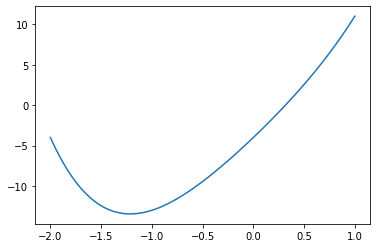

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 1, 100)
y = x**4 + 2*x**2 + 12*x -4
plt.plot(x, y)
plt.show

### Resultado

- Máximo global: $x=1$
- Mínimo global: $x= -1.2134117$

# Exercício 5

### A partir dos dados da tabela abaixo, encontre f(0,6), usando:


Usaremos a função do numpy polyfit() para fazer a interpolação dos pontos. Olhando a tabela:

In [13]:
import pandas as pd
n = [0, 1, 2, 3]
x = [0.1, 0.3, 0.5, 0.7]
f_x = [0.1010, 0.3270, 0.6250, 1.0430]

tabela = {'n':pd.Series(data = n), 'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

n,x,f(x)
0,0.1,0.101
1,0.3,0.327
2,0.5,0.625
3,0.7,1.043


#### (a) polinômio de grau 1

In [23]:
import numpy as np
x = [0.1, 0.3, 0.5, 0.7]
f_x = [0.1010, 0.3270, 0.6250, 1.0430]
coef_poli_interpolador = np.polyfit(x, f_x, 1)
curva_ajustada = np.poly1d(coef_poli_interpolador)
print(curva_ajustada(0.6))
print(coef_poli_interpolador)

0.8364000000000004
[ 1.562  -0.1008]


#### Resposta

$f(0,6) \approx 0.8364$

polinômio interpolador: $y = 1.563 x - 0.1008$


#### (b) polinômio de grau 2, com 3 pontos

In [16]:
import numpy as np
x = [0.3, 0.5, 0.7]
f_x = [0.3270, 0.6250, 1.0430]
coef_poli_interpolador = np.polyfit(x, f_x, 2)
curva_ajustada = np.poly1d(coef_poli_interpolador)
curva_ajustada(0.6)

0.8190000000000002

$f(0.6) \approx 0.819$

#### (c) polinômio de grau 3, todos os pontos

In [19]:
import numpy as np
x = [0.1, 0.3, 0.5, 0.7]
f_x = [0.1010, 0.3270, 0.6250, 1.0430]
coef_poli_interpolador = np.polyfit(x, f_x, 3)
curva_ajustada = np.poly1d(coef_poli_interpolador)
curva_ajustada(0.6)

0.8160000000000002

$f(0.6) \approx 0.816$

#### (d) estimando o erro



Para obter o erro usamos a fórmula:

$$|R_n(x)| \leq \frac{|x-x_0||x-x_1|...|x-x_n|}{(n+1)!} \max_{t\in[0,1;0,7]} |f^{n+1}(t)|$$

- No caso da letra (a), temos um polinômio de grau 1. Logo:

$$|R_1(x)|\leq \frac{|x-x_0||x-x_1|}{(2)!} \max_{t\in[0,1;0,7]} |f''(t)|$$


$$|R_1(0.6)|\leq \frac{|0,6-0,1||0,6-0,3|}{(2)!} \max_{t\in[0,1;0,7]} |f''(t)|$$


$$|R_1(0.6)|\leq 0,075 \max_{t\in[0,1;0,7]} |f''(t)|$$

# E agora?

Porém, temos um problema, não conhecemos $f(t)$. Para contornar o problema usaremos a fórmula alternativa do erro, onde $Dd_{n+1}$ denota as diferenças divididas de ordem n+1.

$$|R_n(x)| \leq |x-x_0||x-x_1|...|x-x_n| max|Dd_{n+1}$$

Tentei criar um algoritmo que obtenha as diferenças divididas, mas não deu certo. Soluções da Internet também não ajudaram. Como só tem essa questão, vou fazer a tabela manualmente.

# Exercício 6


### Dada a tabela, determine f(1) sabendo que f é um polinômio de grau 3.

In [151]:
import pandas as pd

x = [-2, -1, 0, 1, 2, 3]
f_x = [-7, 0, 1, 'k', 9, 28]
tabela = {'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,f(x)
-2,-7
-1,0
0,1
1,k
2,9
3,28


Vamos usar interpolar os pontos que conhecemos para encontrar f(1).

In [157]:
import numpy as np
x = [-2, -1, 0, 2, 3]
f_x = [-7, 0, 1, 9, 28]
coef_poli_interpolador = np.polyfit(x, f_x, 3)
print("coeficientes:{}".format(coef_poli_interpolador))

coeficientes:[ 1.00000000e+00 -9.98226367e-16 -2.09345661e-15  1.00000000e+00]


Assim temos $p(x) = x^4 - 9,98 e^{-16} - 2,093 e^{-15} + 1$

Logo, $p(1) = 1,99999999999$

### E por fim, $f(1) = 2$

#  Exercício 7

### A temperatura, T (em ºC), em um tanque com água é uma função da profundidade x (em metros). São dadas algumas informações na tabela abaixo. Em uma determinada profundidade, menor do que 2 metros, a segunda derivada de T(x) muda de sinal. Estime esta profundidade utilizando interpolação polinomial e todos os pontos da tabela. Considerar três casas decimais.


In [118]:
import pandas as pd

x = [1, 1.5, 2, 2.5, 3]
f_x = [66, 52, 18, 11, 10]
tabela = {'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,f(x)
1,66
1.5,52
2,18
2.5,11
3,10


In [127]:
import numpy as np
x = [1, 1.5, 2, 2.5, 3]
f_x = [66, 52, 18, 11, 10]
coef_poli_interpolador = np.polyfit(x, f_x, 4)
print("coeficientes:{}".format(coef_poli_interpolador))

coeficientes:[  -45.33333333   380.         -1126.66666667  1352.
  -494.        ]


### $p(x) = -45,333 x^4 + 380x^3 - 1126,667 x^2 + 1352x -494$


Vamos estudar o sinal da segunda derivada do polinômio encontrado, tomando o intervalo $[0, 2]$.

$p''(x) = - 543,996x^2 + 2280 - 2253.334$


In [137]:
x = [0, 1, 2]
f_x = [- 543.996*(j**2) - 2280*j - 2253.334 for j in x]
tabela = {'x': pd.Series(data = x), 'p\'\'(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,p''(x)
0,-2253.33
1,-5077.33
2,-8989.32


Chegamos a um problema de encontrar o zero da função, e para resolvê-lo iremos usar o método de newton, que é mais rápido. Dessa vez vou escolher o chute inicial arbitrariamente, apenas por praticidade.

In [146]:
f = lambda x: -543.996*(x**2) + 2280*x - 2253.334
chute_inicial = 1
precisao = 1/(10**4)
max_iteracoes = 10

tabela = newton(f, chute_inicial, precisao, max_iteracoes)
tabela.style.hide_index()

O valor de x que aproxima ao zero da função é 1.5962380


n,x_n,f(x_n),f'x_n,|x_n - x_n-1|
1,1,-517.33,1191.95,0.434019
2,1.43402,-102.45,719.745,0.142342
3,1.57636,-11.0143,564.878,0.0194986
4,1.59586,-0.205764,543.663,0.000378477
5,1.59624,-5.73356e-05,543.252,1.05542e-07


### Portanto, a profundidade estimada é de 1,596m

#  Exercício 8

### Encontre $\int_{0}^{2} f(x) dx$ pelas regras do Trapézio generalizado e Simpson, sabendo que $f(0)=0$, $f(1)=2$, $f(2)=\frac{1}{2}$.


Vamos começar observando os pontos da f.

In [13]:
import pandas as pd
x = [0, 1, 2]
f_x = [0, 2, 0.5]

tabela = {'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,f(x)
0,0
1,2
2,0.5


Esse exemplo é simples o suficiente para resolver a questão no papel, mas iremos construir algoritmos para poder replicar as técnicas utilizadas.

In [20]:
def trapezio_generalizado_pontos(x, y):
    soma = 0
    for i in range(0, len(x)-1):
        h = (x[i+1]-x[i])
        trapezio = ((y[i+1]+ y[i])* h)/2
        soma = soma + trapezio
    
    return soma

In [22]:
x = [0, 1, 2]
f_x = [0, 2, 0.5]
print(trapezio_generalizado_pontos(x,f_x))

2.25


#### Pelo método do trapézio generalizado, encontramos que $\int_{0}^{2} f(x) dx \approx 2,25$.

Agora vamos à regra de Simpson.

In [34]:
# apenas para  3 pontos
def simpson_pontos(x, y):
    h = (x[2] - x[0])/2
    simpson = (h/3)*(y[0] + 4*y[1] + y[2])
    return simpson   

In [35]:
x = [0, 1, 2]
f_x = [0, 2, 0.5]
print(simpson_pontos(x,f_x))

2.833333333333333


#### Pela Regra de Simpson, $\int_{0}^{2} f(x) dx \approx 2,83333$.

#  Exercício 9

### Calcule pela regra do Trapézio e pela regra de Simpson, usando 4 subdivisões do intervalo. Estime os erros.


### (a) $\int_{1}^{2.2} sen^2(\frac{\pi}{2}x) dx$

In [69]:
def trapezio_generalizado_funcao(f, a, b, n):
    '''
    - Função: trapezio_generalizado_funcao(f, a, b, n)
    - Autor: Eduardo Freire Mangabeira
    - Aproxima o valor de uma integral definida usando a regra do trapézio.
    - Feito a partir das aulas do professor Hamilton(ENCE), notas de aula da Unesp \ 
    e do livro Burden, R. L., & Faires, D. J. (1985). Numerical analysis.
    - É precisso passar uma expressão lambda para o parâmetro 'f', fiz isso para deixar o código mais geral e menos verboso.
    - Para expresões lambda, visitar: http://www.dsc.ufcg.edu.br/~pet/jornal/maio2013/materias/tutoriais.html.
    '''
    h = (b-a)/(n)
    x = a + h
    soma = 0
    for i in range(1, n):
        soma = soma + f(x)
        x = x + h
        
    integral = h * ((f(a)+f(b))/2+soma)
    return integral

In [66]:
import numpy as np
f = lambda x: (np.sin((np.pi/2) * x)) ** 2
a = 1
b = 2.2
n = 4
trapezio_generalizado_funcao(f, a, b, n)

0.5134804866652349

#### Temos que  $\int_{1}^{2.2} sen^2(\frac{\pi}{2}x) dx \approx 0.5135 $

Para estimar o erro, usamos a fórmula:

$$|E_{TG}| \leq \frac{nh^3}{12} \max_{t\in[a;b]} |f''(t)|$$


Como $f''(t) = -\dfrac{{\pi}^2\left(\sin^2\left(\frac{{\pi}t}{2}\right)-\cos^2\left(\frac{{\pi}t}{2}\right)\right)}{2}$

Observando o gráfico, o máximo de $f''(t)$ é em $t = 2$(o mesmo resultado poderia ser obtido calculando os pontos críticos).

Logo,

$$|E_{TG}| \leq \frac{nh^3}{12} \frac{\pi^2}{2}$$

$$|E_{TG}| \leq \frac{4(0.3)^3}{12} \frac{\pi^2}{2}$$

$$|E_{TG}| \leq 0,0444$$

##### Agora iremos usar a regra de Simpson






In [87]:
def simpson_generalizado_funcao(f, a, b, n):
    '''
    - Função: trapezio_generalizado_funcao(f, a, b, n)
    - Autor: Eduardo Freire Mangabeira
    - Aproxima o valor de uma integral definida usando a regra de Simpson.
    - Feito a partir das aulas do professor Hamilton(ENCE), notas de aula da Unesp \ 
    e do livro Burden, R. L., & Faires, D. J. (1985). Numerical analysis.
    - É precisso passar uma expressão lambda para o parâmetro 'f', fiz isso para deixar o código mais geral e menos verboso.
    - Para expresões lambda, visitar: http://www.dsc.ufcg.edu.br/~pet/jornal/maio2013/materias/tutoriais.html.
    '''
    h = (b-a)/(n)
    x = a + h
    soma_pares = 0
    soma_impares = 0
    for i in range (1, n):
        if i%2 == 0:
            soma_pares = soma_pares + f(x)
        else:
            soma_impares = soma_impares + f(x)
        x = x + h
    integral = (h/3)*(f(a)+f(b)+4*soma_impares+2*soma_pares)
    return integral

In [89]:
import numpy as np
f = lambda x: (np.sin((np.pi/2) * x)) ** 2
a = 1
b = 2.2
n = 4
simpson_generalizado_funcao(f, a, b, n)

0.505993198043222

#### Temos que  $\int_{1}^{2.2} sen^2(\frac{\pi}{2}x) dx \approx 0.506 $

Para estimar o erro, usamos a fórmula:

$$|E_{SG}| \leq \frac{nh^5}{180} \max_{t\in[a;b]} |f^{(4)}(t)|$$

Temos que $f^{(4)}(t) = \dfrac{{\pi}^4\left(\sin^2\left(\frac{{\pi}t}{2}\right)-\cos^2\left(\frac{{\pi}t}{2}\right)\right)}{2}$

Observando o  gráfico da função, o máximo de $f^{(4)}(t)$ ocorre em $t = 1$.

Logo,

$$|E_{SG}| \leq \frac{nh^5}{180} \dfrac{\pi^4}{2}$$

$$|E_{SG}| \leq \frac{4(0.3^5)}{180} \dfrac{\pi^4}{2}$$

$$|E_{SG}| \leq 0,0026$$

### (b)  $\int_{2}^{4} ln(x) dx$

### Trapézio

In [92]:
import numpy as np
# No numpy ln(x) é obtido por np.log(x). Para base 10 usar np.log10(x).
f = lambda x: np.log(x)
a = 2
b = 4
n = 4
trapezio_generalizado_funcao(f, a, b, n)

2.1536933799387756

#### Temos que  $\int_{2}^{4} ln(x) dx \approx 2.1537 $

Vamos encontrar o erro.

$f''(t) = -\dfrac{1}{t^2}$

O máximo da segunda derivada no intervalo ocorre em $t = 4$.

$$|E_{TG}| \leq \frac{4\Big(\dfrac{1}{2}\Big)^3}{12} 0,0625$$

$$|E_{TG}| \leq 0,0026 $$


### Simpson

In [93]:
import numpy as np
# No numpy ln(x) é obtido por np.log(x). Para base 10 usar np.log10(x).
f = lambda x: np.log(x)
a = 2
b = 4
n = 4
simpson_generalizado_funcao(f, a, b, n)

2.1588134867490245

#### Temos que  $\int_{2}^{4} ln(x) dx \approx 2.1588 $

Vamos encontrar o erro.

$f^{(4)}(t) = -\dfrac{6}{t^4}$

O máximo da segunda derivada no intervalo ocorre em $t = 4$.


$$|E_{SG}| \leq \frac{4\Big(\frac{1}{2}\Big)^5}{180} \frac{3}{128}$$


$$|E_{SG}| \leq 0,000016 $$

#  Exercício 10

### O PROCON tem recebido reclamações com relação ao peso dos pacotes de açúcar de 5kg. Com a finalidade de verificar a validade das reclamações, foi coletada uma amostra de 100 pacotes. Com isto, chegou-se à conclusão de que para determinar a probabilidade de um pacote de açúcar pesar menos do que 5kg deve ser avaliada a expressão a seguir.

$$F = 0,5 + \dfrac{1}{\sqrt{2\pi}} \int_{0}^{1,8}e^{-0,5x^2} dx$$

### Estime essa probabilidade e o erro cometido utilizando a Regra de Simpson. Divida o intervalo de integração em 6 partes e faça os cálculos com 4 casas decimais.


Para fazer a aproximação por 4 casas decimais, vamos precisar da ajuda de uma função.


In [102]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [112]:
import numpy as np
f = lambda x: np.exp(-0.5*(x**2))
a = 0
b = 1.8
n = 6
resultado = 0.5 + simpson_generalizado_funcao(f, a, b, n)/ np.sqrt(2*np.pi)
truncate(resultado, 4)

0.964

#### Logo, seja X uma variável aleatória tal que X: "peso do pacote".

$$P(X<5) \approx 0.9635$$



Agora vamos encontrar o erro associado.

Seja $f(t) = e^{0,5x^2}$.

$f^{(4)}(t) = \left(t^4+6t^2+3\right)\mathrm{e}^\frac{t^2}{2}$

o máximo ocorre em $t = 1,8$.


$$|E_{SG}| \leq \frac{6\Big(\frac{1,8}{6}\Big)^5}{180} 166,437$$

$$|E_{SG}| \leq 0,0013$$



#  Exercício 11

### Encontre a parábola que melhor se ajusta aos pontos da tabela abaixo, pelo Método dos Mínimos Quadrados.

Vamos olhar a tabela.

In [114]:
import pandas as pd

x = [-2,-1.5, 0, 1, 2.2, 3.1]
f_x = [-30.5, -20.2, -3.3, 8.9, 16.8, 21.4]
tabela = {'x': pd.Series(data = x), 'f(x)': pd.Series(data = f_x)}
tabela = pd.DataFrame(tabela)
tabela.style.hide_index()

x,f(x)
-2,-30.5
-1.5,-20.2
0,-3.3
1,8.9
2.2,16.8
3.1,21.4


Basta usar o np.polyfit(), que aplica o método dos mínimos quadrados.

In [117]:
import numpy as np
x = [-2,-1.5, 0, 1, 2.2, 3.1]
f_x = [-30.5, -20.2, -3.3, 8.9, 16.8, 21.4]
coef_poli_interpolador = np.polyfit(x, f_x, 2)
print("coeficientes:{}".format(coef_poli_interpolador))

coeficientes:[-1.22223104 11.33154761 -2.01765329]


Portanto,

### $y = -1,222 x^2 + 11,33x - 2,018$ 